In [1]:
"{:,}".format(100000)

'100,000'

In [2]:
import wave

with wave.open("./BnK_data/20200327-095410(UTC)-200327_AnechoicChamber_0degrees_seq1_v1-0000872342.wav") as fh:
#     print(str(fh.getnchannels()) + " channels")
#     print(".wav " + str(8*fh.getsampwidth()) + "-bit file")
#     print("Sampling frequency: " + str("{:,}".format(fh.getframerate())) + " Hz")
#     print("Number of frames (i.e. samples): " + str("{:,}".format(fh.getnframes())))
#     print("Is compressed(?):", fh.getcomptype())
#     print(fh.getparams())
    
    wav_params = fh.getparams()
    print(
        wav_params.nchannels,"\n",
        wav_params.sampwidth,"\n",
        wav_params.framerate,"\n",
        wav_params.nframes)
    a = fh.readframes(100)
    fh.rewind() # read from start of .wav
    b = fh.readframes(100)
    print(fh.tell()) # get current file pointer position
    print(a==b)
    fh.setpos(3262374) # skip to sample in file
    print(fh.tell())

6 
 3 
 65536 
 5898240
100
True
3262374


786432
786432.0
2654208
26542080
5898240


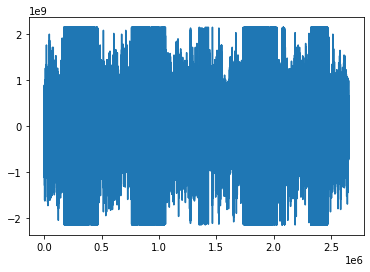

In [49]:
import numpy
import matplotlib.pyplot as pp

# Read file to get buffer                                                                                               
ifile = wave.open("./BnK_data/20200327-095410(UTC)-200327_AnechoicChamber_0degrees_seq1_v1-0000872342.wav")
samples = ifile.getnframes()
data = ifile.readframes(samples)

# Convert buffer to float32 using NumPy                                                                                 
audio_as_np_int32 = numpy.frombuffer(data, dtype=numpy.int32)
audio_as_np_float32 = audio_as_np_int32.astype(numpy.float32)

# Normalise float32 array so that values are between -1.0 and +1.0                                                      
max_int16 = 2**15
audio_normalised = audio_as_np_float32 / max_int16

print(audio_as_np_int32[1342])
print(audio_as_np_float32[1342])

chunk = int(wav_params.nframes / 10)

def shrink(lst):
    smaller_list = []
    for i in range(len(lst)):
        if i%10 == 0:
            smaller_list.append(lst[i])
    return smaller_list

data_snipet = shrink(audio_as_np_int32)
print(len(data_snipet))
print(len(audio_as_np_int32))
print(wav_params.nframes)
pp.plot(data_snipet)

In [50]:
bytes_object = b'\x01\x00\x00\x00\x00\xf0'
[int.from_bytes(bytes_object[x:x+3], byteorder='little', signed=True) for x in range(0, len(bytes_object), 3)]

[1, -1048576]

In [60]:
help(int.from_bytes)
len(bytes_object)

Help on built-in function from_bytes:

from_bytes(bytes, byteorder, *, signed=False) method of builtins.type instance
    Return the integer represented by the given array of bytes.
    
    bytes
      Holds the array of bytes to convert.  The argument must either
      support the buffer protocol or be an iterable object producing bytes.
      Bytes and bytearray are examples of built-in objects that support the
      buffer protocol.
    byteorder
      The byte order used to represent the integer.  If byteorder is 'big',
      the most significant byte is at the beginning of the byte array.  If
      byteorder is 'little', the most significant byte is at the end of the
      byte array.  To request the native byte order of the host system, use
      `sys.byteorder' as the byte order value.
    signed
      Indicates whether two's complement is used to represent the integer.



6

In [61]:
!python3 -m pip install soundfile

Defaulting to user installation because normal site-packages is not writeable


In [62]:
import soundfile as sf
data, samplerate = sf.read("./BnK_data/20200327-095410(UTC)-200327_AnechoicChamber_0degrees_seq1_v1-0000872342.wav")

In [63]:
len(data)

5898240

In [64]:
!python3 -m pip install wavefile

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for wavefile: filename=wavefile-1.5-py3-none-any.whl size=11590 sha256=a66cac314ddb80a5f2578b083178f481c55f91845bb86f8e7b76fae5d433a533
  Stored in directory: /home/butterlyn/.cache/pip/wheels/fd/17/55/37a9e0c0347d7b825ad1d4947fee7ad0e46e45ea0ac1729c77
Successfully built wavefile


In [70]:
import wavefile

filepath = "./BnK_data/20200327-095410(UTC)-200327_AnechoicChamber_0degrees_seq1_v1-0000872342.wav"

with wavefile.wavefile.loadWave(filepath) as fh:
    pass

AttributeError: __enter__